In [ ]:
from google.colab import drive
drive.mount('/content/drive')


Mounted at /content/drive


In [ ]:
import tensorflow as tf
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.applications import InceptionV3
from tensorflow.keras.models import Model
from tensorflow.keras.layers import Dense, GlobalAveragePooling2D
from tensorflow.keras.optimizers import Adam
import matplotlib.pyplot as plt
import os


In [ ]:
# Dataset path (update this with the path to your dataset on Google Drive)
dataset_path = '/content/drive/MyDrive/pharyngitis_balanced'

# Hyperparameters
batch_size = 32
image_size = (299, 299)  # Required input size for InceptionV3
validation_split = 0.2  # 20% of the data for validation

# Data augmentation
datagen = ImageDataGenerator(
    rescale=1.0/255,  # Normalize pixel values to [0, 1]
    validation_split=validation_split,  # Split dataset into training and validation
    horizontal_flip=True,
    rotation_range=20,
    zoom_range=0.2
)

# Create training and validation generators
train_gen = datagen.flow_from_directory(
    dataset_path,
    target_size=image_size,
    batch_size=batch_size,
    class_mode='categorical',
    subset='training'  # Use the training subset
)

val_gen = datagen.flow_from_directory(
    dataset_path,
    target_size=image_size,
    batch_size=batch_size,
    class_mode='categorical',
    subset='validation'  # Use the validation subset
)


Found 510 images belonging to 3 classes.
Found 126 images belonging to 3 classes.


In [ ]:
# Load InceptionV3 base model
base_model = InceptionV3(weights='imagenet', include_top=False, input_shape=(299, 299, 3))

# Add custom layers
x = base_model.output
x = GlobalAveragePooling2D()(x)  # Global pooling layer
x = Dense(1024, activation='relu')(x)  # Fully connected layer
predictions = Dense(3, activation='softmax')(x)  # Output layer for 3 classes

# Create the final model
model = Model(inputs=base_model.input, outputs=predictions)

# Freeze the base model layers (initial training)
for layer in base_model.layers:
    layer.trainable = False

# Compile the model
model.compile(
    optimizer=Adam(learning_rate=0.0001),  # Low learning rate
    loss='categorical_crossentropy',
    metrics=['accuracy']
)


87910968/87910968 ━━━━━━━━━━━━━━━━━━━━ 1s 0us/step


In [ ]:
# Train the model
history = model.fit(
    train_gen,
    validation_data=val_gen,
    epochs=20,  # You can adjust this
    steps_per_epoch=train_gen.samples // batch_size,
    validation_steps=val_gen.samples // batch_size
)


Epoch 1/20


/usr/local/lib/python3.10/dist-packages/keras/src/trainers/data_adapters/py_dataset_adapter.py:122: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


15/15 ━━━━━━━━━━━━━━━━━━━━ 227s 12s/step - accuracy: 0.4420 - loss: 1.0719 - val_accuracy: 0.6979 - val_loss: 0.6962
Epoch 2/20
 1/15 ━━━━━━━━━━━━━━━━━━━━ 2:11 9s/step - accuracy: 0.5000 - loss: 0.8406

/usr/lib/python3.10/contextlib.py:153: UserWarning: Your input ran out of data; interrupting training. Make sure that your dataset or generator can generate at least `steps_per_epoch * epochs` batches. You may need to use the `.repeat()` function when building your dataset.
  self.gen.throw(typ, value, traceback)


15/15 ━━━━━━━━━━━━━━━━━━━━ 16s 489ms/step - accuracy: 0.5000 - loss: 0.8406 - val_accuracy: 0.8000 - val_loss: 0.6219
Epoch 3/20
15/15 ━━━━━━━━━━━━━━━━━━━━ 169s 11s/step - accuracy: 0.7203 - loss: 0.6683 - val_accuracy: 0.7708 - val_loss: 0.5388
Epoch 4/20
15/15 ━━━━━━━━━━━━━━━━━━━━ 54s 3s/step - accuracy: 0.7812 - loss: 0.5103 - val_accuracy: 0.8000 - val_loss: 0.4820
Epoch 5/20
15/15 ━━━━━━━━━━━━━━━━━━━━ 207s 11s/step - accuracy: 0.8111 - loss: 0.5176 - val_accuracy: 0.8021 - val_loss: 0.4848
Epoch 6/20
15/15 ━━━━━━━━━━━━━━━━━━━━ 16s 653ms/step - accuracy: 0.7812 - loss: 0.5095 - val_accuracy: 0.6667 - val_loss: 0.5480
Epoch 7/20
15/15 ━━━━━━━━━━━━━━━━━━━━ 187s 11s/step - accuracy: 0.7986 - loss: 0.4967 - val_accuracy: 0.8542 - val_loss: 0.4471
Epoch 8/20
15/15 ━━━━━━━━━━━━━━━━━━━━ 17s 468ms/step - accuracy: 0.8125 - loss: 0.5164 - val_accuracy: 0.8000 - val_loss: 0.4852
Epoch 9/20
15/15 ━━━━━━━━━━━━━━━━━━━━ 183s 11s/step - accuracy: 0.8505 - loss: 0.4188 - val_accuracy: 0.9062 - val

In [ ]:
loss, accuracy = model.evaluate(val_gen)
print(f"Validation Loss: {loss}")
print(f"Validation Accuracy: {accuracy}")


4/4 ━━━━━━━━━━━━━━━━━━━━ 35s 8s/step - accuracy: 0.7978 - loss: 0.3721
Validation Loss: 0.35328832268714905
Validation Accuracy: 0.8095238208770752


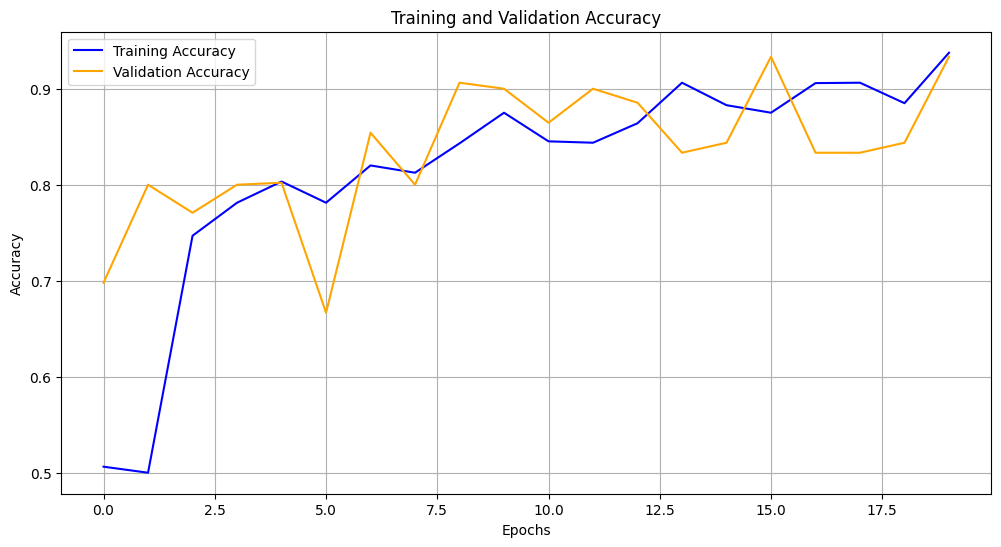

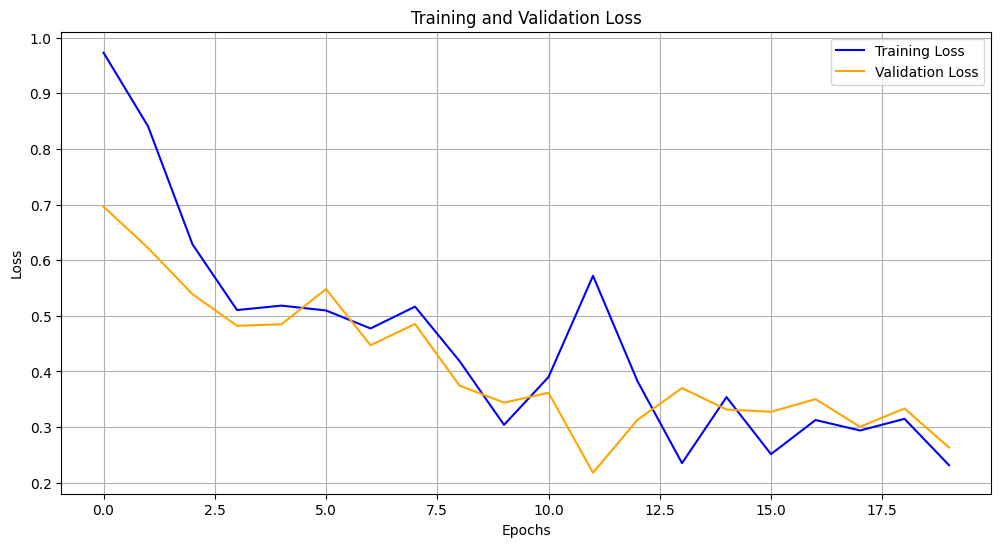

In [ ]:
# Plot accuracy
plt.figure(figsize=(12, 6))
plt.plot(history.history['accuracy'], label='Training Accuracy', color='blue')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy', color='orange')
plt.title('Training and Validation Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.grid(True)
plt.show()

# Plot loss
plt.figure(figsize=(12, 6))
plt.plot(history.history['loss'], label='Training Loss', color='blue')
plt.plot(history.history['val_loss'], label='Validation Loss', color='orange')
plt.title('Training and Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.grid(True)
plt.show()
